In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import os
import csv

In [45]:
# calling the csv file that I created in the data exploration and clean up 
diabetes_population_data = pd.read_csv("../Resources2/Diabetes_Population_Data_Combined.csv")
diabetes_population_data 

,State,FIPS Codes,County,Number of People with Diabetes 2010,Percentage of People with Diabetes 2010,Number of People with Diabetes 2013,Percentage of People with Diabetes 2013,Population 2010,Population Density 2010,Density per square mile of land area - Housing units,Population Density 2013,Population 2013
0,Alabama,1001,Autauga County,4560,11.8,5144,13,54571,91.8,37.2,91.802847,54571.0
1,Alabama,1003,Baldwin County,16197,11.8,15367,10.4,182265,114.6,65.5,114.644655,182265.0
2,Alabama,1005,Barbour County,2945,14.2,3813,18.4,27457,31.0,13.4,31.029169,27457.0
3,Alabama,1007,Bibb County,1906,11.1,2557,14.8,22915,36.8,14.4,36.806354,22915.0
4,Alabama,1009,Blount County,5841,14.0,5990,14.1,57322,88.9,37.0,88.897949,57322.0
5,Alabama,1011,Bullock County,1436,17.5,1588,19.6,10914,17.5,7.2,17.523934,10914.0
6,Alabama,1013,Butler County,2463,16.0,2676,17.7,20947,27.0,12.8,26.964771,20947.0
7,Alabama,1015,Calhoun County,12146,13.9,13000,14.9,118572,195.7,88.0,195.699146,118572.0
8,Alabama,1017,Chambers County,3860,15.0,4259,16.4,34215,57.4,28.5,57.356574,34215.0
9,Alabama,1019,Cherokee County,2696,13.6,2685,13.3,25989,46.9,29.4,46.935232,25989.0


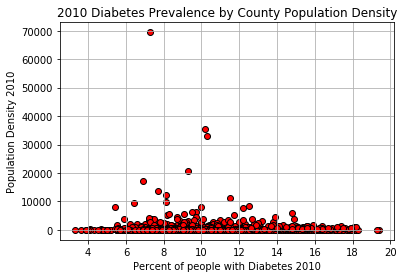

In [46]:
plt.grid(True)
    
x= diabetes_population_data["Percentage of People with Diabetes 2010"]

y= diabetes_population_data["Population Density 2010"]
           
z = np.polyfit(x, y, 2)
p = np.poly1d(z)

# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence by County Population Density")
plt.xlabel("Percent of people with Diabetes 2010")
plt.ylabel("Population Density 2010")


plt.scatter(x, y, marker = "o", c="Red", linewidth=1, facecolors = "Purple", edgecolors = "black")
plt.show()




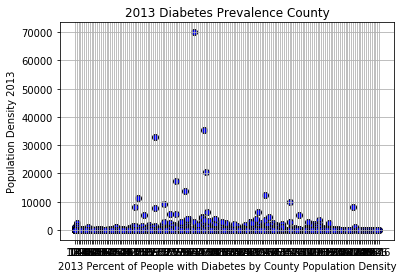

In [47]:
plt.grid(True)
    
x= diabetes_population_data["Percentage of People with Diabetes 2013"]
            #diabetes_population_data ["Density per square mile of land area - Population"],
y= diabetes_population_data["Population Density 2013"]
           #s= diabetes_population_data['Population']/1000,
            #alpha = 0.3,
            #c="Red",
            #linewidth=1, edgecolor = "black")

# Create a title, x label, and y label for our chart
plt.title("2013 Diabetes Prevalence County")
plt.xlabel("2013 Percent of People with Diabetes by County Population Density")
plt.ylabel("Population Density 2013")



plt.scatter(x, y, marker = "o", c="Blue", linewidth=1, facecolors = "Purple", edgecolors = "black")
plt.show()

In [48]:
states = diabetes_population_data["State"].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [49]:
# map states to population diabetes means
def getStateMean(state):
    return diabetes_population_data.loc[diabetes_population_data["State"] == state]["Percentage of People with Diabetes 2010"].mean()
    
states_diabetes_population_mean_2010 = [ {"state": state, "mean": getStateMean(state)} for state in states]


In [50]:
states_means_2010 = pd.DataFrame(states_diabetes_population_mean_2010)
states_means_2010

,mean,state
0,14.082090,Alabama
1,7.368966,Alaska
2,10.080000,Arizona
3,12.454667,Arkansas
4,8.077586,California
5,6.306250,Colorado
6,8.287500,Connecticut
7,10.600000,Delaware
8,8.100000,District of Columbia
9,11.598507,Florida


Text(0, 0.5, 'States')

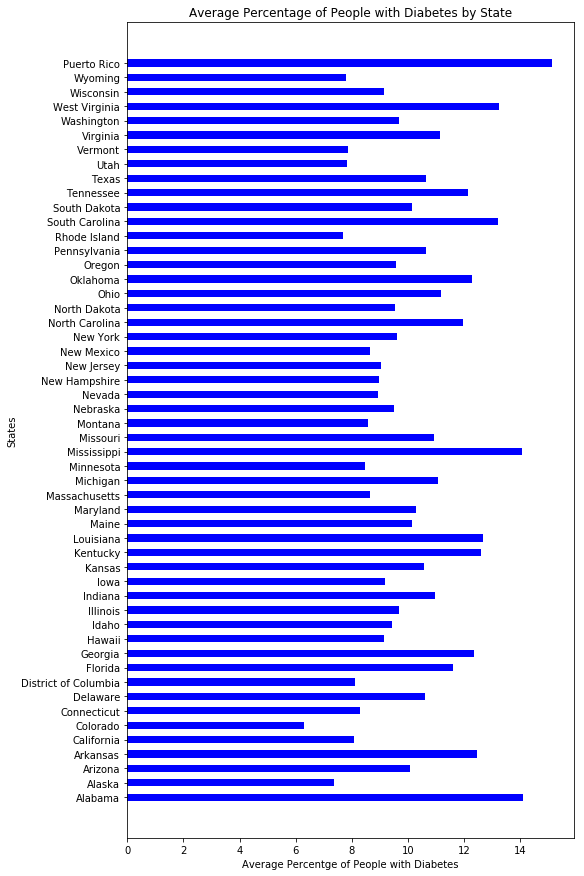

In [51]:
state = diabetes_population_data["State"].unique()
means = states_means_2010["mean"]
state_ticks = np.arange(len(means))
plt.figure(figsize=(8,15))
plt.barh(state_ticks, means,  height=0.5, color="b", align="center")
plt.yticks(state_ticks, state)

plt.title("Average Percentage of People with Diabetes by State")
plt.xlabel("Average Percentge of People with Diabetes")
plt.ylabel("States")

Text(0, 0.5, 'Frequency of Percentages')

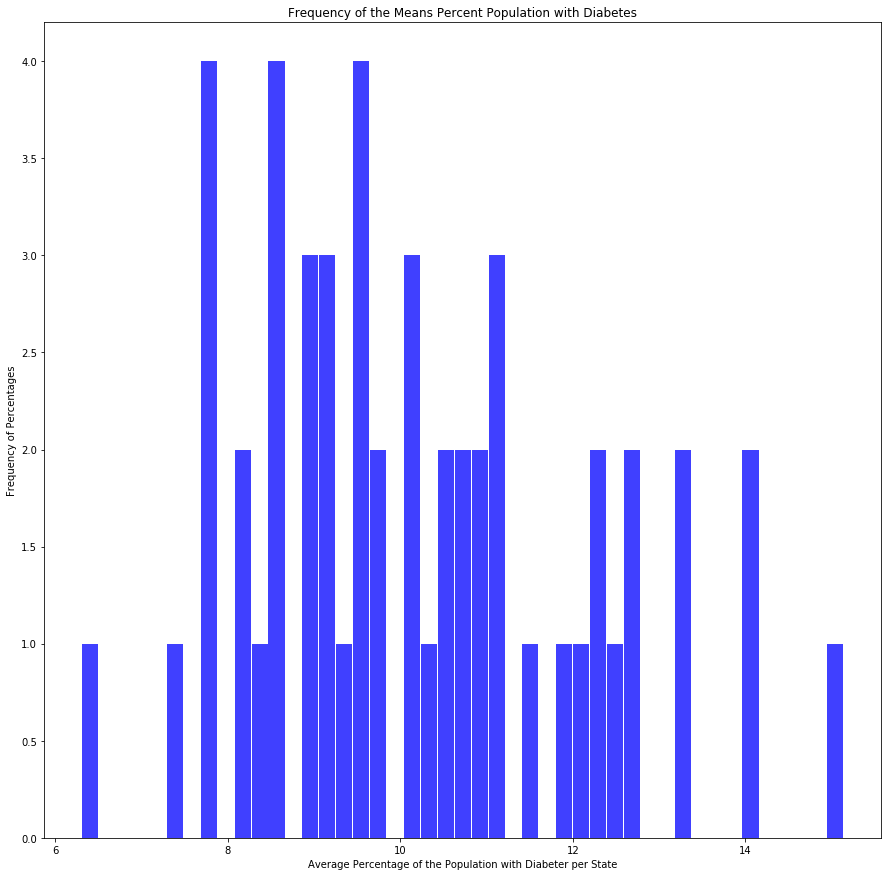

In [52]:
state_ticks = np.arange(len(means))
means = states_means_2010["mean"]

plt.figure(figsize=(15,15))

plt.hist(means, bins = (45), facecolor="b", rwidth=0.95, alpha=0.75)

plt.title("Frequency of the Means Percent Population with Diabetes")
plt.xlabel("Average Percentage of the Population with Diabeter per State")
plt.ylabel("Frequency of Percentages")
